<a href="https://colab.research.google.com/github/ancka019/data_analysis-/blob/main/hw8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [ ]:
import os
import folium

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/FLATS.xlsx')

In [ ]:
df.head()

,SQUARE_METERS,METRO_DISTANCE,PRICE
0,28,677,7328400
1,54,120,9754600
2,43,1344,6781500
3,33,1003,6784100
4,30,591,7296200


In [ ]:
print('Rows in the data frame: {0}'.format(len(df)))
print('Rows without NAN: {0}'.format(len(df.dropna(how='any'))))

Rows in the data frame: 100
Rows without NAN: 100


**Построение модели**
по лекции CS


#**1. На основе количества метров**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [ ]:
del df['Id']


In [ ]:
df.head()

,SQUARE_METERS,METRO_DISTANCE,PRICE
0,28,677,7328400
1,54,120,9754600
2,43,1344,6781500
3,33,1003,6784100
4,30,591,7296200


In [ ]:
X = df.drop('SQUARE_METERS', axis=1)
y = df['PRICE']

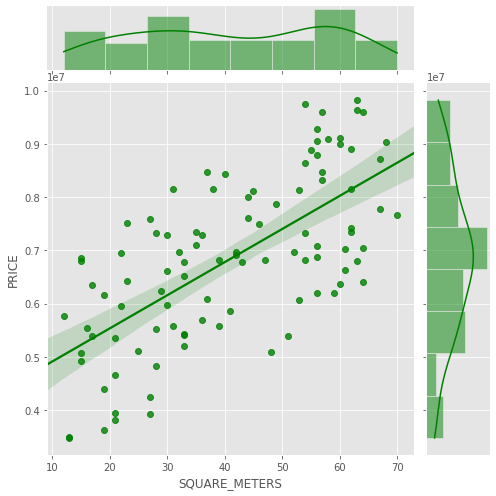

In [ ]:
g = sns.jointplot(x='SQUARE_METERS', y='PRICE', data=df, kind="reg",color = 'g', truncate=False, height=7)

In [ ]:
SQUARE_METERS = df['SQUARE_METERS']
y = df['PRICE']
reg1 = linear_model.LinearRegression()
SQUARE_METERS = SQUARE_METERS.values.reshape(-1,1)
reg1.fit(SQUARE_METERS, y)

LinearRegression()

In [ ]:
coef = pd.DataFrame(zip(['intercept'] + df.drop(['PRICE'] , axis=1).columns.tolist(), [reg1.intercept_] + reg1.coef_.tolist()),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,4.292936e+06
1,SQUARE_METERS,6.214873e+04


In [ ]:
PrintMetrics(y, reg1.predict(SQUARE_METERS))

The mean absolute error: 990261.942495025
The root mean squared error: 1141985.1272904899
The mean percentage error: 3.301140379120922
The mean absolute percentage error: 15.693792634540443
Absolute deviation: 91939101.20964508
The mean absolute deviation: 919391.0120964508
Theil: 0.11574465364713012


In [ ]:
print ('R^2: {0}'.format(reg1.score(SQUARE_METERS, y)))

R^2: 0.45222058564965073


# **на основе расстояния до метро**

In [ ]:
M = df['METRO_DISTANCE']

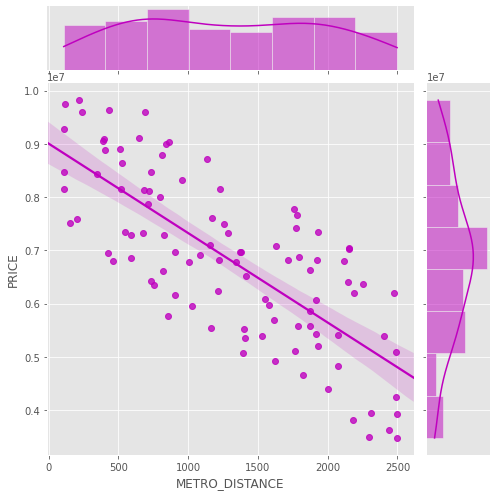

In [ ]:
g = sns.jointplot(x='METRO_DISTANCE', y='PRICE', data=df,
                  kind="reg", truncate=False,
                  color="m", height=7)

In [ ]:
reg2 = linear_model.LinearRegression()
M = M.values.reshape(-1,1)
reg2.fit(M, y)

LinearRegression()

In [ ]:
coef = pd.DataFrame(zip(['intercept'] + df.drop(['PRICE'] , axis=1).columns.tolist(), [reg2.intercept_] + reg2.coef_.tolist()),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,9.003176e+06
1,SQUARE_METERS,-1.679031e+03


In [ ]:
print ('R^2: {0}'.format(reg2.score(M, y)))

R^2: 0.5775983380546676


In [ ]:
PrintMetrics(y, reg2.predict(M))

The mean absolute error: 870605.1584099769
The root mean squared error: 1002814.0345235703
The mean percentage error: 2.569573659947029
The mean absolute percentage error: 13.780389955268438
Absolute deviation: 101989176.67189084
The mean absolute deviation: 1019891.7667189084
Theil: 0.10148364845817766


# **на основе квадратных метров & расстояния до метро**

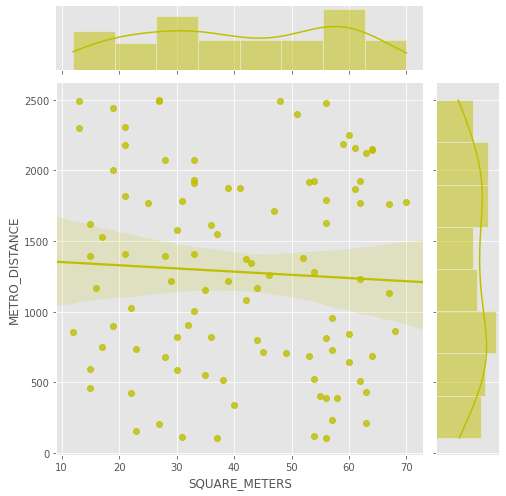

In [ ]:
g = sns.jointplot(x='SQUARE_METERS', y='METRO_DISTANCE', data=df, kind="reg",color = 'y', truncate=False, height=7)

In [ ]:
x = df.drop(['PRICE'] , axis=1)

In [ ]:
reg3 = linear_model.LinearRegression()
reg3.fit(x, y)

LinearRegression()

In [ ]:
y_pred = reg3.predict(x)

In [ ]:
coef = pd.DataFrame(zip(['intercept'] + x.columns.tolist(), [reg3.intercept_] + reg3.coef_.tolist()),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,6.496840e+06
1,SQUARE_METERS,5.852554e+04
2,METRO_DISTANCE,-1.603460e+03


In [ ]:
print ('R^2: {0}'.format(reg3.score(x, y)))

R^2: 0.9774581227423352


In [ ]:
PrintMetrics(y, y_pred)

The mean absolute error: 188069.8356556663
The root mean squared error: 231660.84415639355
The mean percentage error: 0.13061066905935748
The mean absolute percentage error: 2.8459159522276805
Absolute deviation: 121653918.61100899
The mean absolute deviation: 1216539.1861100898
Theil: 0.02333036423632188


# **Метрики качества**

In [ ]:
def metrics(real, forecast):
    
    if type(real)==pd.core.frame.DataFrame:
        real=real[real.columns[0]].values
    
    print("Тест на стационарность:")
    dftest = adfuller(real-forecast, autolag='AIC')
    print("\tT-статистика = {:.3f}".format(dftest[0]))
    print("\tP-значение = {:.3f}".format(dftest[1]))
    print("Критические значения :")
    for k, v in dftest[4].items():
        print("\t{}: {} - Данные {} стационарны с вероятностью {}% процентов".format(k, v, "не" if v<dftest[0] else "", 100-int(k[:-1])))
    
    #real=np.array(real[real.columns[0]].values)
    forecast=np.array(forecast)
    print('MAD:', round(abs(real-forecast).mean(),4))
    print('MSE:', round(((real-forecast)**2).mean(),4))
    print('MAPE:', round((abs(real-forecast)/real).mean(),4))
    print('MPE:', round(((real-forecast)/real).mean(),4))
    print('Стандартная ошибка:', round(((real-forecast)**2).mean()**0.5,4)) 


In [ ]:
def MAD(y_real, y_pred):
    return (AD(y_real, y_pred)/len(y_real))

In [ ]:
def MAPE(y_real, y_pred): 
    y_true, y_pred = np.array(y_real), np.array(y_pred)
    return np.mean(np.abs(y_real - y_pred)/ y_real) * 100

In [ ]:
def MPE(y_real: np.ndarray, y_pred: np.ndarray):
    res = 0
    for (real, pred) in zip(y_real, y_pred):
        res += (pred - real)/real
    res /= len(y_real)
    res *= 100
    return res

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
def MPE(y_real: np.ndarray, y_pred: np.ndarray):
    res = 0
    for (real, pred) in zip(y_real, y_pred):
        res += (pred - real)/real
    res /= len(y_real)
    res *= 100
    return res
def MAPE(y_real, y_pred): 
    y_true, y_pred = np.array(y_real), np.array(y_pred)
    return np.mean(np.abs(y_real - y_pred)/ y_real) * 100
def AD(y_real, y_pred):
    res = 0
    for pred in y_pred:
        res += np.abs(pred - y_real.mean())
    return res
def MAD(y_real, y_pred):
    return (AD(y_real, y_pred)/len(y_real))
def Theil(y_real: np.ndarray, y_pred: np.ndarray):
    res, sum1, sum_pred, sum_real = 0, 0, 0, 0
    for (real, pred) in zip(y, y_pred):
        sum1 += (pred - real)**2
        sum_pred += pred**2
        sum_real += real**2
    res = np.sqrt(sum1/(sum_pred + sum_real))
    return res
def PrintMetrics(y, y_pred):
    print ('The mean absolute error: {0}'.format(mean_absolute_error(y, y_pred)))
    print ('The root mean squared error: {0}'.format(np.sqrt(mean_squared_error(y, y_pred))))
    print ('The mean percentage error: {0}'.format(MPE(y, y_pred)))
    print ('The mean absolute percentage error: {0}'.format(MAPE(y, y_pred)))
    print ('Absolute deviation: {0}'.format(AD(y, y_pred)))
    print ('The mean absolute deviation: {0}'.format(MAD(y, y_pred)))
    print ('Theil: {0}'.format(Theil(y, y_pred)))